In [1]:
import pandas as pd


In [4]:
combined_df = pd.read_csv('/Users/elliottlevy/slam-dunk-analytics/combined.csv')
combined_df

,School,Conf,G,GS,MP,FG,FGA,FGPCT,2P,2PA,...,TOV,PF,PTS,player_x,last_season,unique_player_key,draft_year,new_key,round,pick
0,Canisius,0.0,41.0,19.0,546.0,2.6,6.4,0.414,2.6,6.2,...,2.9,6.7,7.3,Menghe a'Nyam,2007-08,"Menghe a'Nyam, Canisius, 2007-08",2008,"Menghe a'Nyam, 2008",0,0
1,North Dakota State,0.0,115.0,16.0,1287.0,5.2,8.4,0.619,5.2,8.4,...,2.1,5.8,12.5,Jordan Aaberg,2013-14,"Jordan Aaberg, North Dakota State, 2013-14",2014,"Jordan Aaberg, 2014",0,0
2,Portland,0.0,92.0,29.0,1513.0,3.4,9.7,0.346,1.1,3.0,...,2.1,5.7,9.9,Karl Aaker,2004-05,"Karl Aaker, Portland, 2004-05",2005,"Karl Aaker, 2005",0,0
3,Overall,0.0,107.0,55.0,2037.0,6.5,13.6,0.473,6.5,13.6,...,2.6,5.1,16.6,Mike Aaman,2016-17,"Mike Aaman, Overall, 2016-17",2017,"Mike Aaman, 2017",0,0
4,Marquette,0.0,45.0,1.0,175.0,3.9,9.1,0.425,2.7,5.7,...,5.0,2.3,13.3,Craig Aamot,1992-93,"Craig Aamot, Marquette, 1992-93",1993,"Craig Aamot, 1993",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51999,VMI,0.0,6.0,0.0,17.0,9.4,21.2,0.444,2.4,4.7,...,4.7,4.7,25.9,Clint Zwayer,2001-02,"Clint Zwayer, VMI, 2001-02",2002,"Clint Zwayer, 2002",0,0
52000,Richmond,0.0,114.0,40.0,2035.0,5.1,10.0,0.515,5.1,9.9,...,1.8,5.6,13.4,Eric Zwayer,2003-04,"Eric Zwayer, Richmond, 2003-04",2004,"Eric Zwayer, 2004",0,0
52001,UNC,0.0,120.0,66.0,2423.0,6.0,12.0,0.501,6.0,12.0,...,1.6,3.8,13.8,Serge Zwikker,1996-97,"Serge Zwikker, UNC, 1996-97",1997,"Serge Zwikker, 1997",2,29
52002,Stony Brook,0.0,2.0,0.0,7.0,5.7,17.1,0.333,0.0,11.4,...,0.0,5.7,17.1,Michal Zylinski,2008-09,"Michal Zylinski, Stony Brook, 2008-09",2009,"Michal Zylinski, 2009",0,0


In [5]:
X = combined_df[['G', 'GS', 'MP',
       'FG', 'FGA', 'FGPCT', '2P', '2PA', '2PPCT', '3P', '3PA', '3PPCT', 'FT',
       'FTA', 'FTPCT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',]]
y = combined_df['round'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



## RFE

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

n_score_list = []

for i in range(1, len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    n_score_list.append(mean(n_scores))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [12]:
max_score = max(n_score_list[1:])
best_features = n_score_list.index(max_score) + 1
best_features

9

In [14]:
pipeline.fit(X_train_scaled, y_train)
pipeline.score(X_test_scaled, y_test)

0.9608491654488116

In [16]:
average_n_scores = mean(n_score_list[1:])
average_n_scores

0.9600894012054118

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 1.000/0.964


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 3, Train/Test Score: 0.981/0.974


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.979/0.976


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 7, Train/Test Score: 0.978/0.976


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.977/0.976


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.977/0.977


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.977/0.977


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 15, Train/Test Score: 0.977/0.976


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.977/0.976


/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 19, Train/Test Score: 0.977/0.976


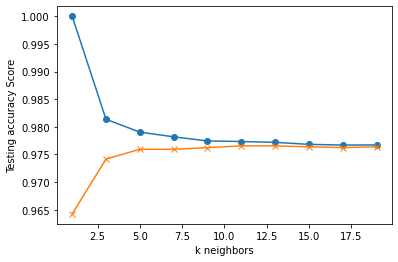

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
import numpy as np

draft_pred_len = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    drafted = sum(np.unique(preds, return_counts=True)[1][1:])
    draft_pred_len.append(drafted)

/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/elliottlevy/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: Data

In [24]:
draft_pred_len

[267, 78, 40, 28, 19, 18, 14, 11, 11, 10]